In [348]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [320]:
import tensorflow as tf

### Parse sound data

In [267]:
def parse_sounds(path):
    S, features, labels = [], np.empty((0,187)), np.empty(0)
    for filename in os.listdir(path):
        if filename.startswith(""):
            X, sample_rate = librosa.load(path+filename) 
            
            spectr = librosa.feature.melspectrogram(X, sr=sample_rate)
            
            S.append(spectr)
            
            mfccs,chroma,mel,contrast = extract_sound_features(X, sample_rate)
            
            ext_features = np.hstack([mfccs,chroma,mel,contrast])
            features = np.vstack([features,ext_features])  
                        
            label = filename.split(".")[0].split("_")[1]
            labels = np.append(labels, label)
            
    return S, np.array(features), np.array(labels, dtype = np.int)

def extract_sound_features(X, sample_rate):
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,
                    axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,
                     axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,
                  axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,
                       axis=0)
    return mfccs,chroma,mel,contrast

In [268]:
path = "C:/Neat/Study/диплом/data/ready/"

S, X, y = parse_sounds(path)

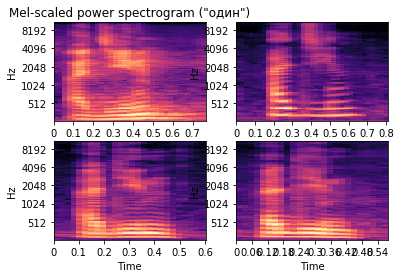

In [262]:
plt.subplot(2, 2, 1)
plt.title('Mel-scaled рower spectrogram ("один")')
librosa.display.specshow(librosa.power_to_db(S[0], ref=np.max), y_axis='mel', x_axis='time')

plt.subplot(2, 2, 2)
librosa.display.specshow(librosa.power_to_db(S[50], ref=np.max), y_axis='mel', x_axis='time')

plt.subplot(2, 2, 3)
librosa.display.specshow(librosa.power_to_db(S[100], ref=np.max), y_axis='mel', x_axis='time')

plt.subplot(2, 2, 4)
librosa.display.specshow(librosa.power_to_db(S[150], ref=np.max), y_axis='mel', x_axis='time')

plt.show()

### Split data

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=100, 
                                                    random_state=42, 
                                                    stratify=y)

### Baseline models (trained on conventional sound features)

In [367]:
c = RandomForestClassifier(random_state=42, 
                           n_estimators=500)

print("cross-val score", cross_val_score(c, X, y).mean())

cross-val score 0.205925925926


In [365]:
clf = RandomForestClassifier(random_state=42, 
                             n_estimators=500)

clf.fit(X_train, y_train)

results = clf.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, results))

# for label, result in sorted(zip(y_test, results), key=lambda x: x[0]):
#     if label == result:
#         print(label, "\t", result, "\t", "+")
#     else:
#         print(label, "\t", result)

accuracy 0.16


In [363]:
c = svm.SVC(kernel="poly")

print("cross-val score", cross_val_score(c, X, y).mean())

cross-val score 0.16


In [ ]:
clf = svm.SVC(kernel="poly", C=20)

clf.fit(X_train, y_train)

results = clf.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, results))

# for label, result in sorted(zip(y_test, results), key=lambda x: x[0]):
#     if label == result:
#         print(label, "\t", result, "\t", "+")
#     else:
#         print(label, "\t", result)